<a href="https://colab.research.google.com/github/Andrey239/ML_LPI_2021/blob/main/seminar03/MLatFIAN2021_seminar03_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

In this example we'll try to predict housing prices.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [2]:
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

Information about the dataset:

In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Exploring the data

Let's just see how the target depends on individual features.

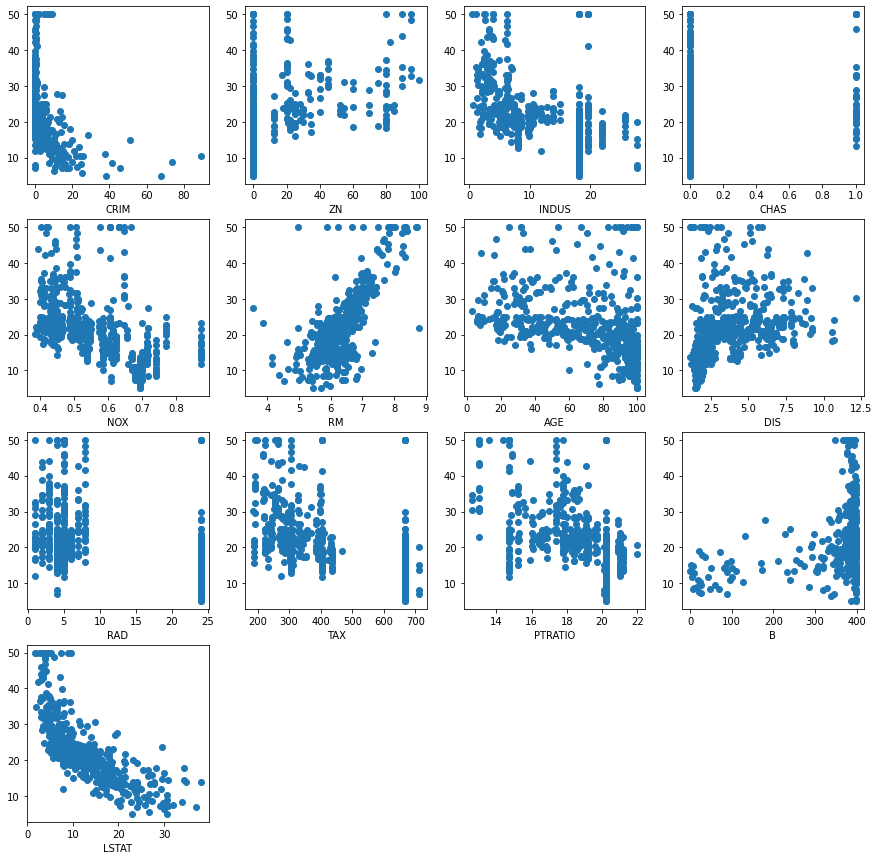

In [4]:
plt.figure(figsize=(15, 15))

grid_size = int(np.ceil(X.shape[1]**0.5))

for i, (name, x) in enumerate(X.iteritems(), 1):
  plt.subplot(grid_size, grid_size, i)
  plt.scatter(x, data.target)
  plt.xlabel(name)

Let's start by trying a simple linear regression model on the features with the most obvious correlation with the target. We'll also scale the features manually.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [6]:
columns = ["CRIM", "RM", "LSTAT"]

X_subset = X[columns]
X_subset /= X_subset.max()

mse =  4.329245029710163


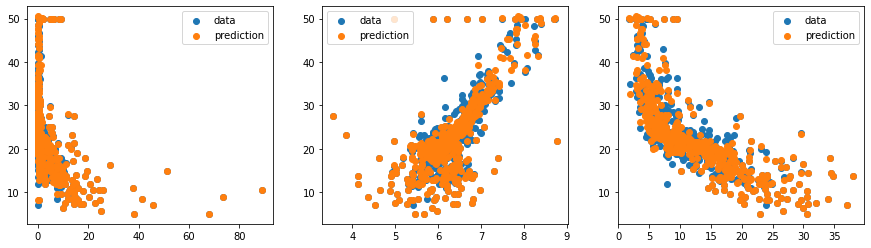

In [7]:
model = make_pipeline(
    PolynomialFeatures(9, include_bias=False), # Can you calculate how many features this will result in? :)
    LinearRegression()
)

model.fit(X_subset, y)
print('mse = ', mean_squared_error(y, model.predict(X_subset)))

plt.figure(figsize=(15, 4))
for i, c in enumerate(columns, 1):
  plt.subplot(1, len(columns), i)
  plt.scatter(X[c], y, label='data')
  plt.scatter(X[c], model.predict(X_subset), label='prediction')
  plt.legend()

# Splitting the data to train and validation parts

Looks like the fit from above is reasonable, right?

In fact, we cannot know this yet: we fitted and predicted on the same data. Let's split our dataset to get a more reasonable estimate of the prediction error.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=50, random_state=42)

In [10]:
model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    LinearRegression()
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  4.16788537704334
test mse =  50727872968635.32


That's quite an error we have on the test set!

Let's look at the prediction.

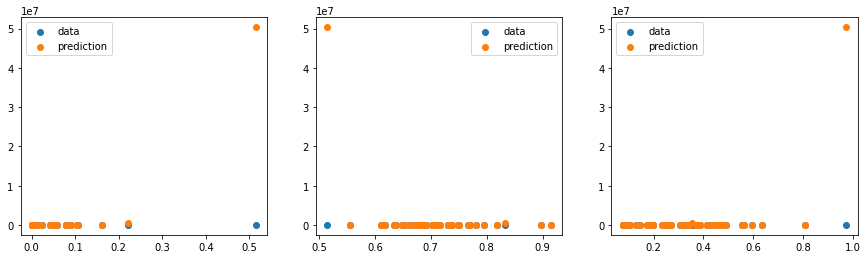

In [11]:
plt.figure(figsize=(15, 4))
for i, c in enumerate(columns, 1):
  plt.subplot(1, len(columns), i)
  plt.scatter(X_test[c], y_test, label='data')
  plt.scatter(X_test[c], model.predict(X_test), label='prediction')
  plt.legend()

That's because our parameter values at the solution are enormous:

In [12]:
model.named_steps['linearregression'].coef_

array([ 1.28947327e+10, -1.08749184e+10, -5.61238377e+09, -1.75648085e+11,
       -1.41766418e+11,  1.84309192e+10,  5.17357694e+10,  5.29620164e+10,
        1.21656120e+10,  4.65437294e+11,  1.53218145e+12,  2.12787208e+11,
        6.77111978e+11, -1.68535676e+11, -4.48015224e+09, -1.43592689e+11,
       -2.19527037e+11, -9.56872638e+10, -1.97065008e+10, -5.73300281e+10,
       -3.35286582e+12, -1.07871819e+12, -5.66457202e+12, -1.96519902e+12,
        4.43616217e+11, -1.83467524e+12,  6.34315816e+11,  1.50487405e+11,
       -1.32111245e+11,  2.56133116e+11,  5.21978398e+11,  3.23024979e+11,
        1.29451559e+11,  2.30603137e+10, -2.61148738e+12,  2.00302805e+12,
       -1.09191910e+12,  9.99406956e+12,  5.72878607e+12,  2.18146343e+12,
        1.15087962e+13,  7.14525935e+12, -1.94217890e+12, -1.10652689e+12,
        3.08481660e+12, -1.28226438e+12, -7.78871843e+11,  6.25643393e+11,
        2.17404122e+11, -3.04371760e+11, -7.78573765e+11, -6.07003716e+11,
       -3.52865979e+11, -

# L2 regularization (ridge regression)

Let's regularize the solution!

In [13]:
from sklearn.linear_model import Ridge

In [20]:
model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=1.)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  21.074472198675984
test mse =  9.925687376519855


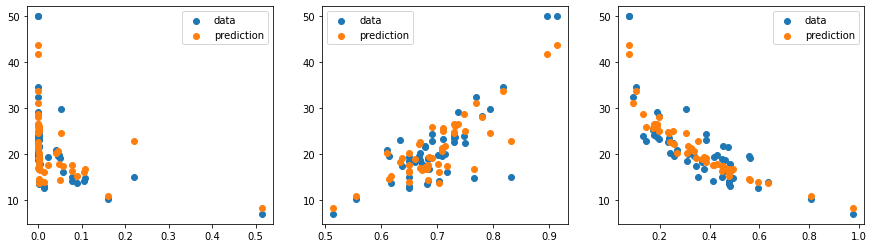

In [21]:
plt.figure(figsize=(15, 4))
for i, c in enumerate(columns, 1):
  plt.subplot(1, len(columns), i)
  plt.scatter(X_test[c], y_test, label='data')
  plt.scatter(X_test[c], model.predict(X_test), label='prediction')
  plt.legend()

In [22]:
model.named_steps['ridge'].coef_

array([-1.23845935e+00,  6.80337412e-01, -1.04516218e+01, -6.06933642e-01,
       -1.75070763e+00, -3.44669853e+00,  3.73993006e+00, -1.02630219e+01,
        3.10005766e-01,  6.82290717e-02, -5.17798133e-01, -2.88972269e-01,
       -1.78955691e+00, -2.67028886e+00, -2.38358119e+00,  6.31479742e+00,
       -8.76312727e+00, -1.69512502e+00,  3.17465678e+00,  2.91933857e-01,
        2.27823462e-02,  2.02508285e-01, -4.17374182e-01, -2.39675968e-01,
       -1.44487856e-01, -1.66464133e+00, -2.03764445e+00, -1.74420145e+00,
       -1.55340734e+00,  7.57968737e+00, -7.00693749e+00, -2.39198958e+00,
        1.05367379e+00,  3.24273531e+00,  3.41819848e-01,  1.87482761e-01,
        2.63473629e-01, -3.99203880e-04,  1.25820117e-01,  1.57553281e-01,
       -3.27667867e-01, -1.91438618e-01, -1.14733061e-01, -1.01793508e-01,
       -1.50564956e+00, -1.54582285e+00, -1.27590144e+00, -1.10050375e+00,
       -1.06216432e+00,  7.51844419e+00, -5.42664219e+00, -2.44301156e+00,
       -4.04724853e-02,  

Now we'll study how losses and parameter values depend on the regularization power.

In [23]:
from tqdm import tqdm

100%|██████████| 90/90 [00:01<00:00, 58.69it/s]


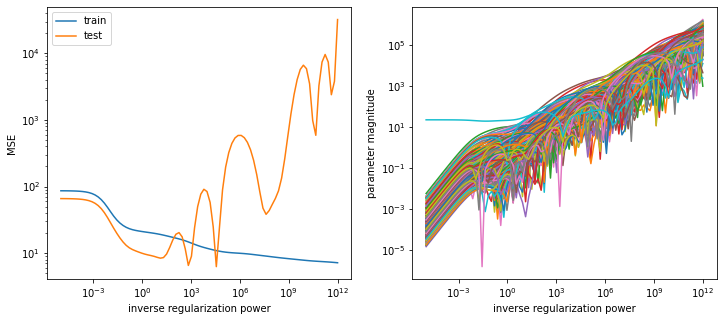

In [24]:
reg_powers = np.logspace(-12, 5, 18 * 5, base=10)


train_mse = []
test_mse = []

params = []

for alpha in tqdm(reg_powers):
  linear_model = Ridge(alpha=alpha)
  model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    linear_model
  )
  model.fit(X_train, y_train)

  params.append(
      np.append(linear_model.coef_,
                linear_model.intercept_)
  )

  train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
  test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

params = np.array(params)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(1. / reg_powers, train_mse, label='train')
plt.plot(1. / reg_powers, test_mse, label='test')
plt.ylabel('MSE')
plt.xlabel('inverse regularization power')
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(1. / reg_powers, np.abs(params));
plt.xlabel("inverse regularization power")
plt.ylabel("parameter magnitude")
plt.xscale('log')
plt.yscale('log')

# L1 regularization (lasso regression)

Here's a similar study with the Lasso regression:

In [26]:
from sklearn.linear_model import Lasso

100%|██████████| 30/30 [00:43<00:00,  1.44s/it]


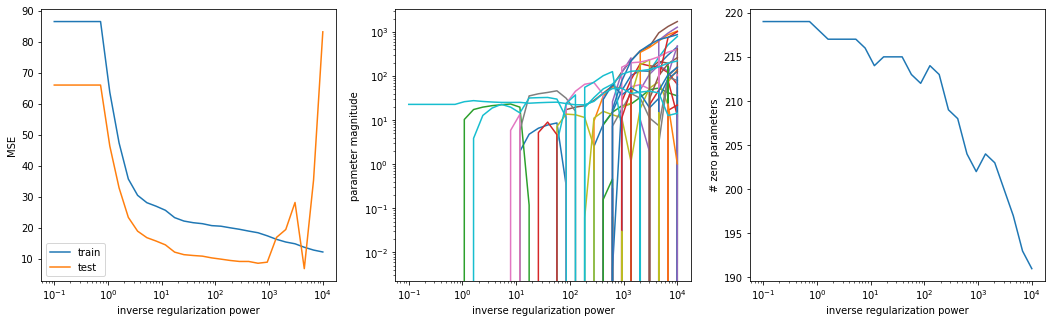

In [27]:
reg_powers = np.logspace(-4, 1, 6 * 5, base=10)

train_mse = []
test_mse = []

params = []

for alpha in tqdm(reg_powers):
  # Lasso doesn't have an analytic solution. Instead it
  # utilizes an iterative procedure, which for small
  # alpha values may take a while to converge.
  linear_model = Lasso(alpha=alpha, max_iter=1000000)
  model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    linear_model
  )
  model.fit(X_train, y_train)

  params.append(
      np.append(linear_model.coef_,
                linear_model.intercept_)
  )

  train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
  test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

params = np.array(params)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)

plt.plot(1. / reg_powers, train_mse, label='train')
plt.plot(1. / reg_powers, test_mse, label='test')
plt.ylabel('MSE')
plt.xlabel('inverse regularization power')
plt.legend()
plt.xscale('log')

plt.subplot(1, 3, 2)
plt.plot(1. / reg_powers, np.abs(params));
plt.xlabel("inverse regularization power")
plt.ylabel("parameter magnitude")
plt.xscale('log')
plt.yscale('log')

plt.subplot(1, 3, 3)
plt.plot(1. / reg_powers, np.isclose(params, 0.).sum(axis=1));
plt.xlabel("inverse regularization power")
plt.ylabel("# zero parameters")
plt.xscale('log')

# Your turn! What features are the most powerful?

Let's see what features are most powerful for a reasonably performing model (e.g. 1/alpha = 100):

In [28]:
model = make_pipeline(
  PolynomialFeatures(9, include_bias=False),
  Lasso(alpha=0.01, max_iter=1000000)
)
model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  20.57054339997833
test mse =  10.076931412558189


Some hints:
 - You can explore the feature names using `get_feature_names` method of the `PolynomialFeatures` class (plug the list of original feature names to get reasonable output).
 - `model.named_steps['polynomialfeatures']` to get the `PolynomialFeatures` preprocessor of our model.
 - `model.named_steps['lasso'].coef_` to get the parameters of the linear model
 - `np.argwhere` to find indices of non-zero elements of an array


In [50]:
#model.named_steps['polynomialfeatures'].get_feature_names(X_train.columns)
#np.argwhere(model.named_steps['lasso'].coef_)

np.array(
    model.named_steps['polynomialfeatures'].get_feature_names(X_train.columns)
)[~np.isclose(model.named_steps['lasso'].coef_, 0)]

array(['CRIM LSTAT', 'RM LSTAT', 'RM^2 LSTAT', 'LSTAT^3', 'RM^4', 'RM^5'],
      dtype='<U19')